# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
import math
import scipy as sp
import numpy as np
from scipy.stats import uniform
from sklearn import preprocessing, svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.metrics import *
%config InlineBackend.figure_format = 'svg'
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
#from imblearn.under_sampling import RandomUnderSampler
import pandas_profiling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import StratifiedKFold

In [30]:
%matplotlib inline

In [31]:
df = pd.read_csv('train.csv')
df2 = df.copy()
print(df.shape)
print(df.describe().T)
imputer_cols = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']
imputer = SimpleImputer (strategy = 'median')
df [imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
               count         mean          std  min     25%     50%     75%  \
PassengerId   7823.0  4345.691039  2504.576803  0.0  2182.5  4345.0  6515.5   
Age           7661.0    28.879389    14.461548  0.0    19.0    27.0    38.0   
RoomService   7669.0   226.078237   679.180148  0.0     0.0     0.0    44.0   
FoodCourt     7668.0   455.643062  1621.290107  0.0     0.0     0.0    69.0   
ShoppingMall  7635.0   172.600393   597.923749  0.0     0.0     0.0    28.0   
Spa           7665.0   305.023222  1133.423579  0.0     0.0     0.0    58.0   
VRDeck        7654.0   295.476744  1093.485752  0.0     0.0     0.0    46.0   
Transported   7823.0     0.506711     0.499987  0.0     0.0     1.0     1.0   

                  max  
PassengerId    8692.0  
Age              79.0  
RoomService   14327.0  
FoodCourt     29813.0  
ShoppingMall  23492.0  
Spa           22408.0  
VRDeck        24133.0  
Transported       1.0  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [32]:
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print (var)
            X.drop(var, inplace = True, axis = 1)
            
passengerId = X.PassengerId
X.drop ('PassengerId',axis = 1, inplace = True)

print(X.columns)
label_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])
    
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 8)

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [34]:
clfs = [DecisionTreeClassifier()]
names = ['Arbol de decision']

trained_models = []
accuracy_models = []

for clf,name in zip(clfs, names):
    print (name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f'Accuracy train {name}: %.2f%%' % (accuracy * 100.0))
    
    train_predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print ('Accuracy test {name}: %.2f%%' % (accuracy * 100.0))
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Arbol de decision
Accuracy train Arbol de decision: 93.90%
Accuracy test {name}: 71.69%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [35]:
grid = GridSearchCV(DecisionTreeClassifier(),
                   {'criterion': ('gini','entropy'),
                   'splitter':('best','random'),
                    'max_depth':(10,20,100)
                   })
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decision: 81.90%
Accuracy test Arbol de decision: 76.17%


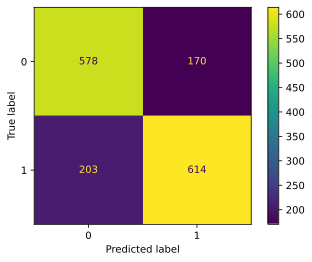

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       748
           1       0.78      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [36]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)

train_predictions = clf.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy train Arbol de decision: %.2f%%' % (accuracy * 100.0))

test_predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print('Accuracy test Arbol de decision: %.2f%%' % (accuracy *100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()
print(classification_report(y_test,clf.predict(X_test)))

In [37]:
FOLDS = 5

cv = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = 10)

X_train2 = np.array(X_train)
y_train2 = np.array(y_train)

for clfi, name in zip ([DecisionTreeClassifier(**grid.best_params_)], names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate (cv.split(X_train2, y_train2)):
        xi, yi = X_train2[train_idx], y_train2[train_idx]
        X_valid, y_valid = X_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)
        
        test_predictions = clfi.predict(X_valid)
        accuracy = accuracy_score (y_valid, test_predictions)
        avg_accuracy += accuracy
        print (f'Precision test fold {fold}: {accuracy * 100.0 :.2f}' % ())
        
    avg_accuracy /= FOLDS
    print (f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precision test fold 0: 78.59
Precision test fold 1: 77.80
Precision test fold 2: 78.12
Precision test fold 3: 77.54
Precision test fold 4: 76.66
Avg. accuracy = 77.74028700362393


## Generar la salida para entregar

In [38]:
test_df = pd.read_csv('test.csv')

In [39]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [40]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']

test_df.drop(['PassengerId', 'Cabin', 'Name'], inplace = True, axis = 1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])
    
cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns = cols)

Generamos la salida

In [41]:
test_id = PassengerId
test_pred = clf.predict(test_df)

In [42]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns = ['PassengerId', 'Transported'])

submission.to_csv('sample_submission.csv', header= True, index = False)

# GRUPO 13

### Alumnos: Mauricio Caggia - Francisco Furey - Luciano Monforte - Alejandro Pitton

# Descripciones
### train.csv - Registros personales de dos tercios (~8700) de los pasajeros, que se utilizarán como datos de entrenamiento.
### PassengerId - Una identificación única para cada pasajero. Cada Id tiene la forma gggg_pp donde gggg indica el grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas de un grupo suelen ser miembros de la familia, pero no siempre.
### HomePlanet - El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
### CryoSleep - Indica si el pasajero eligió ser puesto en animación suspendida durante el viaje. Los pasajeros en criosueño están confinados en sus camarotes.
### Cabin - El número de camarote donde se aloja el pasajero. Tiene la forma cubierta/número/lado, donde el lado puede ser P para babor o S para estribor.
### Destination - El planeta al que desembarcará el pasajero.
### Age - La edad del pasajero.
### VIP - Si el pasajero ha pagado por un servicio especial VIP durante el viaje.
### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.
### Name - El nombre y los apellidos del pasajero.
### Transported - Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que se intenta predecir.
### test.csv - Registros personales del tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Su tarea consiste en predecir el valor de Transportado para los pasajeros de este conjunto.
### sample_submission.csv - Un archivo de envío en el formato correcto.
### PassengerId - Id para cada pasajero en el conjunto de prueba.
### Transportado - El objetivo. Para cada pasajero, predice Verdadero o Falso.

In [43]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7823 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7823 non-null   float64
 8   FoodCourt     7823 non-null   float64
 9   ShoppingMall  7823 non-null   float64
 10  Spa           7823 non-null   float64
 11  VRDeck        7823 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,7823.0,4345.691039,2504.576803,0.0,2182.5,4345.0,6515.5,8692.0
Age,7823.0,28.840470,14.313512,0.0,20.0,27.0,37.0,79.0
RoomService,7823.0,221.627764,673.194124,0.0,0.0,0.0,38.5,14327.0
FoodCourt,7823.0,446.615237,1606.401684,0.0,0.0,0.0,56.5,29813.0
ShoppingMall,7823.0,168.452512,591.285786,0.0,0.0,0.0,23.0,23492.0
Spa,7823.0,298.862713,1122.738262,0.0,0.0,0.0,50.0,22408.0
VRDeck,7823.0,289.093570,1082.461294,0.0,0.0,0.0,40.0,24133.0
Transported,7823.0,0.506711,0.499987,0.0,0.0,1.0,1.0,1.0


# Aqui abajo vamos a separar la columna Cabin en tres columnas diferentes, usando como separador el '/'

In [46]:
df[['Cabin1','Cabin2','Cabin3']] = df.Cabin.str.split(pat = '/', expand = True)
df = df.drop(columns = 'Cabin')
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,C,123,P
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,F,126,S


# Aqui abajo estudiamos 6 variables comparandolas con si fueron transportados a la otra dimension o no (variable a predecir).
### Notamos que si la persona provenia de 'Earth' tiene mas probabilidades de NO haber sido transportada; mientras que si la persona provenia de 'Europa', tiene un 50% mas de probabilidades de SI ser transportada. 
### Tambien notamos que las personas que fueron puestos en CryoSleep tienen mas probabilidades de SI ser transportadas a la otra dimension. Mientras las que NO fueron puestas en CryoSleep tienen mas probabilidades de NO haber sido transportadas a la otra dimension.
### Por ultimo notamos que el haber pagado por un servicio VIP no condiciona en las probabilidades de ser transportada a la otra dimension o no.

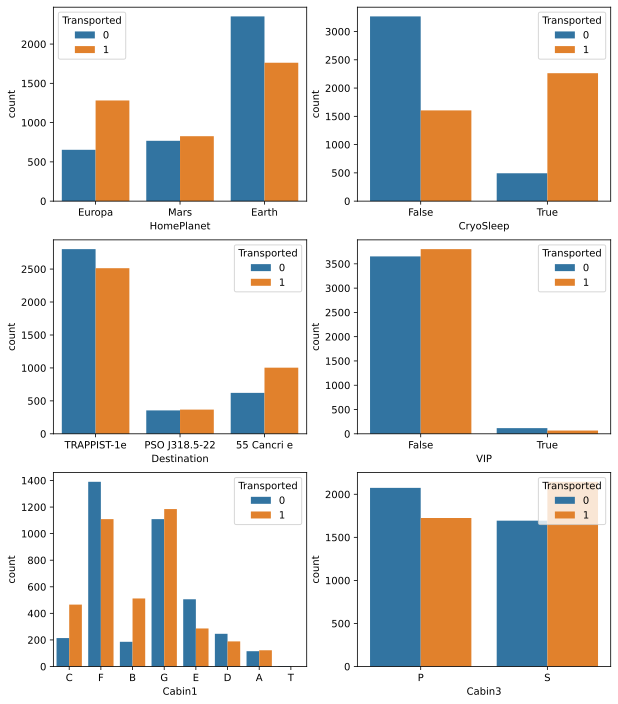

In [47]:
features = ['HomePlanet', 'CryoSleep', 'Destination','VIP','Cabin1','Cabin3']
plt.figure(figsize = (10, 25))
for i in enumerate(features):
    plt.subplot(6, 2,i[0]+1)
    sns.countplot(x=i[1], data = df, hue='Transported')
#    plt.xticks(rotation = 45)

# Aqui abajo estudiamos la variable a predecir, vemos que naturalmente ya esta balanceada, algo bueno para nosotros. 

1    3964
0    3859
Name: Transported, dtype: int64

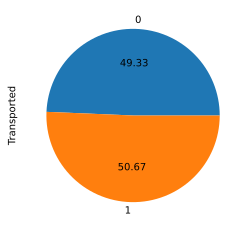

In [48]:
df.groupby('Transported')['Transported'].count().plot(kind='pie',y='Transported',autopct='%.2f');
df.Transported.value_counts()

# Aqui abajo vemos la distribucion de las edades en el dataset. 

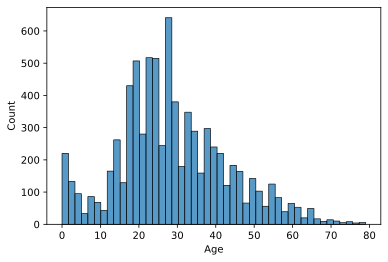

In [49]:
sns.histplot(df.Age);

# Aqui abajo procedemos a setear la columna PassengerId como el indice. 

In [50]:
df = df.set_index('PassengerId')
df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
PassengerId,,,,,,,,,,,,,,,
3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,C,123,P
669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,F,126,S


# Aqui abajo vemos que en ciertas columnas existen valores null, o sin completar. Por lo que vamos a proceder a imputarlos por la moda de la columna para no perder dichas filas y no reducir el tamaño del df

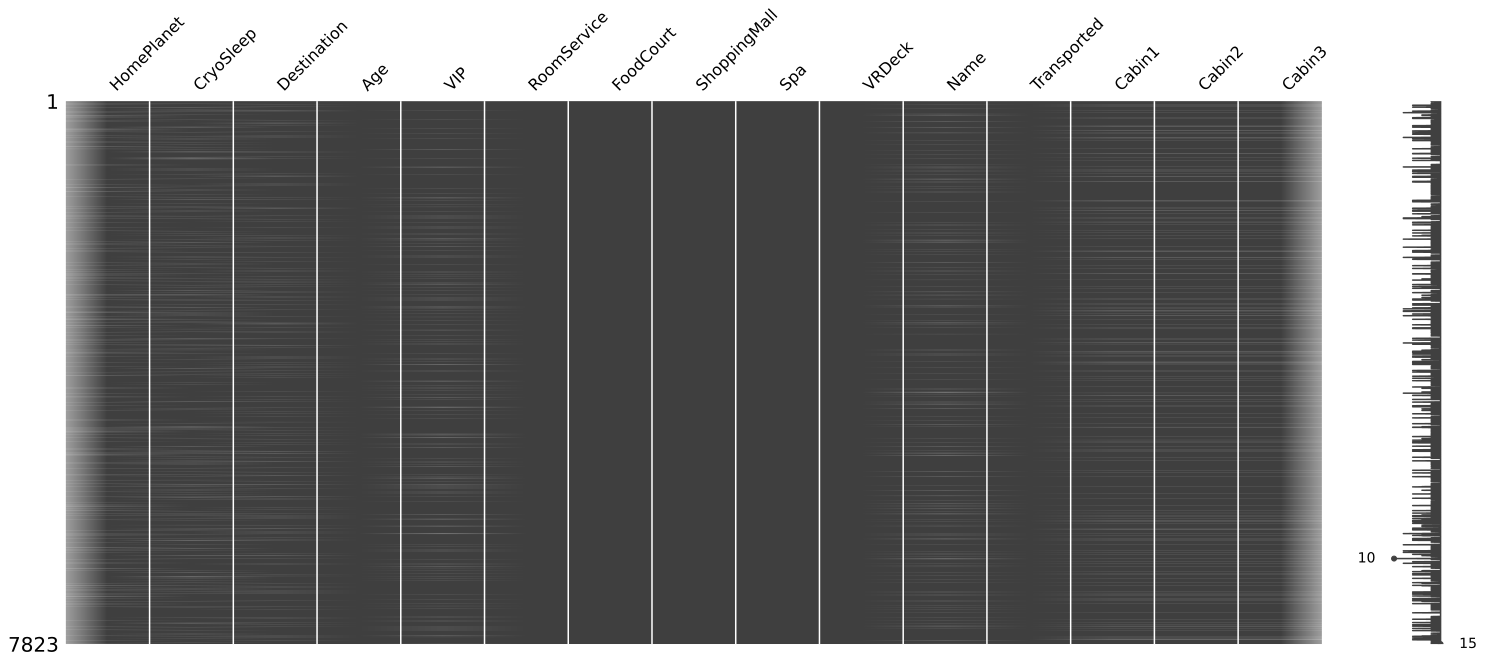

In [51]:
msno.matrix(df);

In [52]:
imputer = SimpleImputer (missing_values = np.nan, strategy = 'most_frequent')
df = pd.DataFrame ( imputer.fit_transform(df), columns = df.columns, index = df.index)
df = df.reset_index(drop=True)

# Aqui abajo procedemos a dropear la variable 'Name', ya que posee una alta cardinalidad como hemos visto antes. 
# Tambien pasamos las variables object a int, para luego aplicar el One Hot Encoding a las que realmente queremos (Destination, HomePlanet y 

In [53]:
df = df.drop(columns = 'Name')

df.Transported = df.Transported.astype('int')
df.VIP = df.VIP.astype('int')
df.CryoSleep = df.CryoSleep.astype('int')
df.Age = df.Age.astype('int')
df.RoomService = df.RoomService.astype('int')
df.FoodCourt = df.FoodCourt.astype('int')
df.ShoppingMall = df.ShoppingMall.astype('int')
df.VRDeck = df.VRDeck.astype('int')
df.Spa = df.Spa.astype('int')
df.Cabin2 = df.Cabin2.astype('int')

In [54]:
df = pd.get_dummies(df, drop_first = True)
df.head(2)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin2,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin3_S
0,0,57,0,0,3859,13,195,3874,0,123,...,0,1,0,1,0,0,0,0,0,0
1,1,18,0,0,0,0,0,0,1,126,...,0,1,0,0,0,0,1,0,0,1


In [55]:
X = df.drop(columns='Transported')
y = df.Transported
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [56]:
power= PowerTransformer(method='yeo-johnson')
X_train=power.fit_transform(X_train)
X_test=power.fit_transform(X_test)

In [57]:
normalizer= preprocessing.StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.fit_transform(X_test)

# RandomForestClassifier

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
rfc= RandomForestClassifier(random_state=0)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
print('Mejores parametros:',gridF.best_params_)
print('Mejor Score:',gridF.best_score_)

Mejores parametros: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Mejor Score: 0.8025925870355645


Accuracy train RandomForestClassifier: 93.12%
Accuracy test RandomForestClassifier: 80.40%


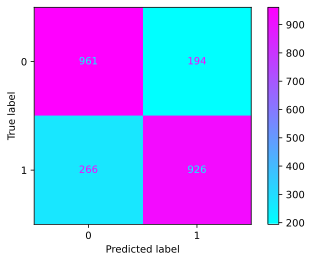

 
        || Reporte de Clasificacion RandomForestClassifier ||
 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1155
           1       0.83      0.78      0.80      1192

    accuracy                           0.80      2347
   macro avg       0.80      0.80      0.80      2347
weighted avg       0.81      0.80      0.80      2347



In [59]:
rfc= RandomForestClassifier(random_state=0,max_depth=25,min_samples_leaf=1,min_samples_split=10,n_estimators=500)
rfc.fit(X_train,y_train)

train_predictions = rfc.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy train RandomForestClassifier: %.2f%%' % (accuracy * 100.0))

y_pred=rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy test RandomForestClassifier: %.2f%%' % (accuracy *100.0))

plot_confusion_matrix(rfc,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion RandomForestClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
param_dist={'n_neighbors':sp.stats.randint(1,10),
           'weights':['uniform','distance'],
           'leaf_size':sp.stats.randint(1,10),
           'algorithm':['auto','kd_tree']}
model=RandomizedSearchCV(knn,param_dist,n_iter=10,cv=5,return_train_score=True)
model.fit(X_train,y_train)
print('Mejores parametros:',model.best_params_)
print('Mejor Score:',model.best_score_)

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'}
Mejor Score: 0.7416016731660167


Accuracy train KNeighbors: 79.86%
Accuracy test KNeighbors: 75.54%


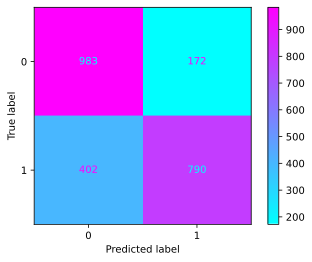

 
        || Reporte de Clasificacion KNN ||
 
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1155
           1       0.82      0.66      0.73      1192

    accuracy                           0.76      2347
   macro avg       0.77      0.76      0.75      2347
weighted avg       0.77      0.76      0.75      2347



In [60]:
neigh=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=1,weights='uniform')
neigh.fit(X_train,y_train)

train_predictions = neigh.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy train KNeighbors: %.2f%%' % (accuracy * 100.0))

y_pred=neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy test KNeighbors: %.2f%%' % (accuracy *100.0))

plot_confusion_matrix(neigh,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion KNN ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# ADA BOOST CLASSIFIER

Accuracy train Clasificacion Adaboost: 80.46%
Accuracy test Clasificacion Adaboost: 79.16%


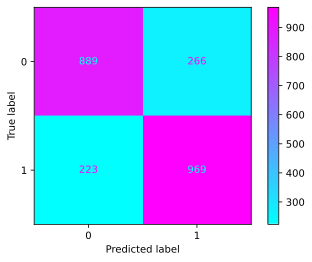

 
        || Reporte de Clasificacion Adaboost ||
 
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1155
           1       0.78      0.81      0.80      1192

    accuracy                           0.79      2347
   macro avg       0.79      0.79      0.79      2347
weighted avg       0.79      0.79      0.79      2347



In [62]:
ada=AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada=ada.fit(X_train,y_train)

train_predictions = ada.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy train Clasificacion Adaboost: %.2f%%' % (accuracy * 100.0))


y_pred= ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy test Clasificacion Adaboost: %.2f%%' % (accuracy *100.0))

plot_confusion_matrix(ada,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion Adaboost ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# SUPORT VECTOR MACHINE 

In [ ]:
svc=SVC(probability=True,random_state=1)
rand_list={'C':uniform(2,10),
          'gamma':uniform(0.1,1)}
rand_search=RandomizedSearchCV(svc,param_distributions=rand_list,n_iter=20,n_jobs=4,cv=3,scoring=auc,random_state=20)
rand_search.fit(X_train,y_train)
print('Mejores parametros:',rand_search.best_params_)

Mejores parametros: {'C': 7.8813080107727425, 'gamma': 0.9977137279094179}


Accuracy train Clasificacion SVMClassifier: 94.38%
Accuracy test Clasificacion SVMClassifier: 71.41%


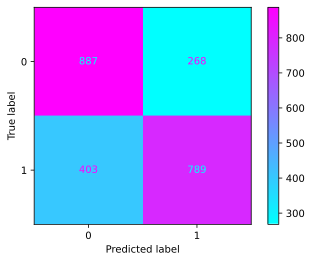

 
        || Reporte de Clasificacion SVMClassifier ||
 
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1155
           1       0.75      0.66      0.70      1192

    accuracy                           0.71      2347
   macro avg       0.72      0.71      0.71      2347
weighted avg       0.72      0.71      0.71      2347



In [63]:
svm=SVC(C=7.8813080107727425,gamma=0.9977137279094179)
svm.fit(X_train,y_train)

train_predictions = svm.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy train Clasificacion SVMClassifier: %.2f%%' % (accuracy * 100.0))


y_pred= svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy test Clasificacion SVMClassifier: %.2f%%' % (accuracy *100.0))




plot_confusion_matrix(svm,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion SVMClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# LGBMClassifier

Accuracy train Clasificacion LightGBM: 90.72%
Accuracy test Clasificacion LightGBM: 81.30%


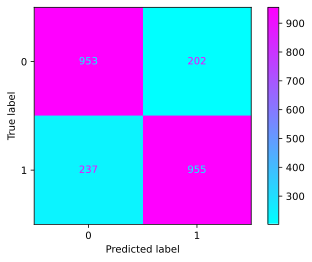

 
        || Reporte de Clasificacion LightGBM ||
 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1155
           1       0.83      0.80      0.81      1192

    accuracy                           0.81      2347
   macro avg       0.81      0.81      0.81      2347
weighted avg       0.81      0.81      0.81      2347



In [64]:
gbm=lgb.LGBMClassifier()
gbm.fit(X_train,y_train)

train_predictions = gbm.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy train Clasificacion LightGBM: %.2f%%' % (accuracy * 100.0))


y_pred= gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy test Clasificacion LightGBM: %.2f%%' % (accuracy *100.0))




plot_confusion_matrix(gbm,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion LightGBM ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

# Aqui abajo hacemos una comparacion entre nuestros 5 modelos para ver grafica y rapidamente cuales son los que mejor predicen. 

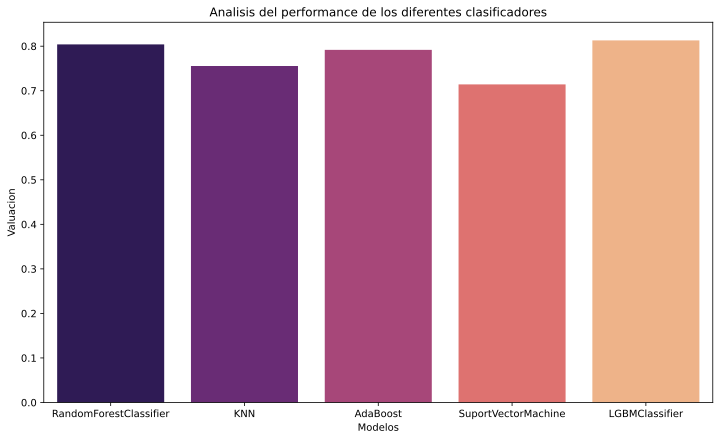

In [65]:
dataPerf = pd.DataFrame(data={'Modelos': ['RandomForestClassifier', 'KNN', 'AdaBoost',
                                        'SuportVectorMachine', 'LGBMClassifier'],
                              'Valuacion': [rfc.score(X_test, y_test),
                                                             neigh.score(X_test, y_test), 
                                                             ada.score(X_test, y_test), 
                                                             svm.score(X_test, y_test),
                                                             gbm.score(X_test, y_test)
                                       ]})

plt.figure(figsize=(12,7))
sns.barplot(x="Modelos", y="Valuacion", data=dataPerf, palette="magma")
plt.title('Analisis del performance de los diferentes clasificadores')
plt.show()

# Generamos la salida para entregar.

In [66]:
test_df = pd.read_csv('test.csv')
PassengerId = test_df.PassengerId

In [67]:
test_df[['Cabin1','Cabin2','Cabin3']] = test_df.Cabin.str.split(pat = '/', expand = True)
test_df = test_df.drop(columns = ['PassengerId' , 'Cabin'])

imputer = SimpleImputer (missing_values = np.nan, strategy = 'most_frequent')
test_df = pd.DataFrame ( imputer.fit_transform(test_df), columns = test_df.columns, index = test_df.index)
df = df.reset_index(drop=True)

test_df = test_df.drop(columns = 'Name')

test_df.VIP = test_df.VIP.astype('int')
test_df.CryoSleep = test_df.CryoSleep.astype('int')
test_df.Age = test_df.Age.astype('int')
test_df.RoomService = test_df.RoomService.astype('int')
test_df.FoodCourt = test_df.FoodCourt.astype('int')
test_df.ShoppingMall = test_df.ShoppingMall.astype('int')
test_df.VRDeck = test_df.VRDeck.astype('int')
test_df.Spa = test_df.Spa.astype('int')
test_df.Cabin2 = test_df.Cabin2.astype('int')

test_df = pd.get_dummies(test_df, drop_first = True)

power= PowerTransformer(method='yeo-johnson')
X_train=power.fit_transform(X_train)
X_test=power.fit_transform(X_test)

normalizer= preprocessing.StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.fit_transform(X_test)

In [68]:
test_pred1 = rfc.predict(test_df)

test_pred2 =  ada.predict(test_df)

test_pred3 =  gbm.predict(test_df)

In [69]:
submission = pd.DataFrame(list(zip(PassengerId, test_pred1)), columns = ['PassengerId', 'Transported'])
submission.to_csv('sample_submission.csv', header = True, index = False)

submission2 = pd.DataFrame(list(zip(PassengerId, test_pred2)), columns = ['PassengerId', 'Transported'])
submission2.to_csv('sample_submission2.csv', header = True, index = False)

submission3 = pd.DataFrame(list(zip(PassengerId, test_pred3)), columns = ['PassengerId', 'Transported'])
submission3.to_csv('sample_submission3.csv', header = True, index = False)
